In [53]:
import pandas as pd

In [54]:
import matplotlib.pylab as plt 

In [55]:
crime=pd.read_csv("C:/Users/elcot/Downloads/crime_data.csv")

In [56]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [57]:
crime=crime.iloc[:,1:5]

In [58]:
from sklearn.preprocessing import normalize

In [59]:
data_scaled = normalize(crime)

In [60]:
data_scaled = pd.DataFrame(data_scaled, columns=crime.columns)

In [61]:
data_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [62]:
import scipy.cluster.hierarchy as shc

In [63]:
plt.figure(figsize=(10, 7))  

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Dendrograms')

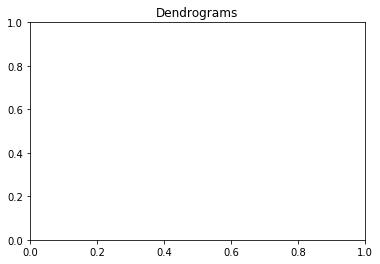

In [64]:
plt.title("Dendrograms")  

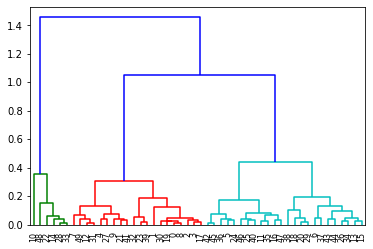

In [65]:
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
h_complet = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

In [68]:
h_complet.fit_predict(data_scaled)

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [69]:
cluster_labels=pd.Series(h_complet.labels_)

In [70]:
crime['clust']=cluster_labels

In [73]:
crime.iloc[:,1:].groupby(crime.clust).median()

,Assault,UrbanPop,Rape,clust
clust,,,,
0,120.0,67.5,17.25,0.0
1,54.5,61.5,11.05,1.0
2,254.5,66.5,25.95,2.0
